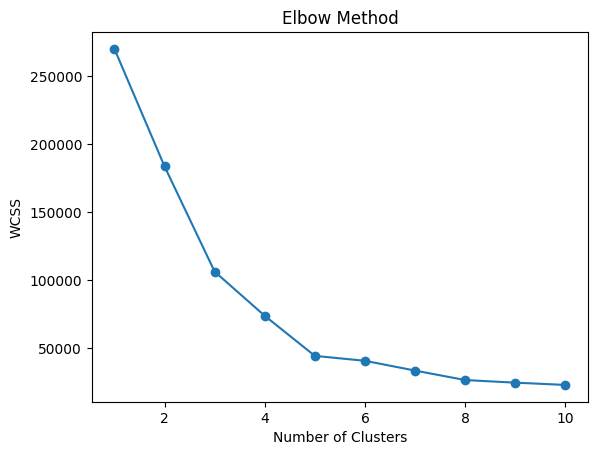

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Load dataset
df = pd.read_csv("/content/archive (1).zip")

# Select features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Elbow method to find optimal clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot elbow curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

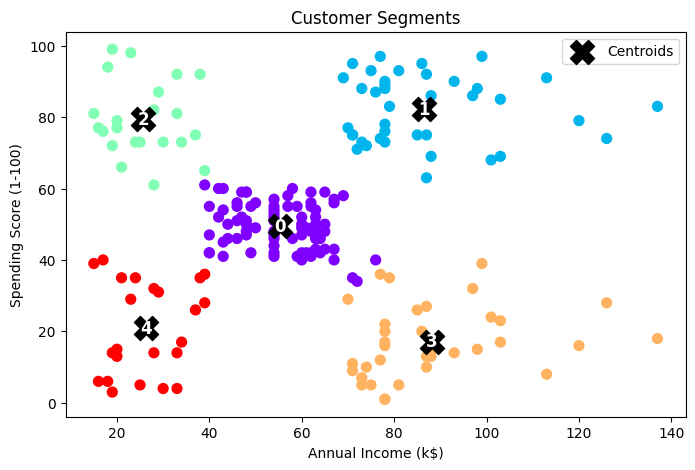

In [22]:
# Train K-means with optimal clusters (say 5)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Add cluster labels to DataFrame
df['Cluster'] = y_kmeans

# Plot clusters
plt.figure(figsize=(8,5))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans, cmap='rainbow', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='black', marker='X', label='Centroids')

# Add cluster numbers at centroids
for i, center in enumerate(kmeans.cluster_centers_):
    plt.text(center[0], center[1], str(i), color='white',
             fontsize=12, ha='center', va='center', fontweight='bold')

plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [23]:
# View sample clustered data
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  


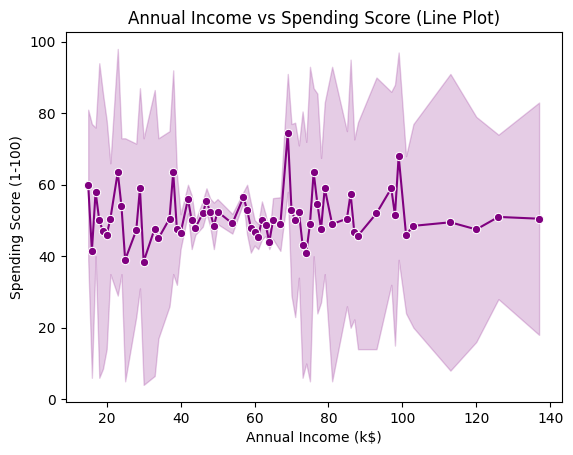

In [25]:
# Relationship between the annual income and spending score
df_sorted = df.sort_values(by='Annual Income (k$)')
sns.lineplot(x='Annual Income (k$)',
             y='Spending Score (1-100)',
             data=df_sorted,
             marker='o',
             color='purple')
plt.title('Annual Income vs Spending Score (Line Plot)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [26]:
# Testing
# Format: [Annual Income (k$), Spending Score (1-100)]
test_data = [
    [15, 39],
    [16, 81],
    [120, 20],
    [80, 60],
    [55, 42]
]

# Create DataFrame for test data
test_df = pd.DataFrame(test_data, columns=['Annual Income (k$)', 'Spending Score (1-100)'])

# Predict clusters for the test data
predicted_clusters = kmeans.predict(test_df)

# Show results
for i, (income, score) in enumerate(test_data):
    print(f"Customer {i+1}: Annual Income = {income}k$, Spending Score = {score} → Cluster {predicted_clusters[i]}")


Customer 1: Annual Income = 15k$, Spending Score = 39 → Cluster 4
Customer 2: Annual Income = 16k$, Spending Score = 81 → Cluster 2
Customer 3: Annual Income = 120k$, Spending Score = 20 → Cluster 3
Customer 4: Annual Income = 80k$, Spending Score = 60 → Cluster 1
Customer 5: Annual Income = 55k$, Spending Score = 42 → Cluster 0
